In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb #python data visualisation library based on matplotlib

%matplotlib inline

In [2]:
inventory = pd.read_csv(r'C:\Users\dell\Documents\Data Science\United Airlines Hackathon\Datasets\Inflight_Service_Inventory.csv')
preOrder = pd.read_csv(r"C:\Users\dell\Documents\Data Science\United Airlines Hackathon\Datasets\Inflight_Service_Pre.csv")
customerComments = pd.read_csv(r"C:\Users\dell\Documents\Data Science\United Airlines Hackathon\Datasets\Survey data _Customer comments.csv")
satisfactionScore = pd.read_csv(r"C:\Users\dell\Documents\Data Science\United Airlines Hackathon\Datasets\Survey data_Inflight Satisfaction Score.csv")

In [3]:
inventory.head()
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61267 entries, 0 to 61266
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   flight_number            61267 non-null  int64 
 1   departure_station_code   61267 non-null  object
 2   arrival_station_code     61267 non-null  object
 3   scheduled_departure_dtl  61267 non-null  object
 4   entree_product_id        61267 non-null  int64 
 5   entree_description       61267 non-null  object
 6   entree_code              61267 non-null  object
 7   planned_entree_count     61267 non-null  int64 
 8   consumed_entree_count    61267 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 4.2+ MB


In [4]:
preOrder.head()
preOrder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212039 entries, 0 to 212038
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   flight_number             212039 non-null  int64 
 1   departure_station_code    212039 non-null  object
 2   arrival_station_code      212039 non-null  object
 3   record_locator            212039 non-null  object
 4   carrier_code              212039 non-null  object
 5   scheduled_departure_date  212039 non-null  object
 6   cabin_code                212039 non-null  object
 7   meal_group                191728 non-null  object
 8   meal_category             191728 non-null  object
 9   meal_short_description    212039 non-null  object
 10  meal_description          137062 non-null  object
 11  is_entree                 191728 non-null  object
 12  pre_order_qty             212039 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 21.0+ MB


In [5]:
print(customerComments.head())
print(customerComments.info())
# print(customerComments['scheduled_departure_date'].nunique())
# print(customerComments['scheduled_departure_date'].unique())

   flight_number origin_station_code destination_station_code  \
0            950                 LHX                      SFX   
1            950                 LHX                      SFX   
2           1876                 FLX                      EWX   
3           5469                 SFX                      SEX   
4            281                 DEX                      ANX   

  scheduled_departure_date arrival_delay_group departure_delay_group  \
0               2022-09-01      Early & Ontime               Delayed   
1               2022-09-01      Early & Ontime               Delayed   
2               2022-09-01      Early & Ontime        Early & Ontime   
3               2022-09-01      Early & Ontime        Early & Ontime   
4               2022-09-01      Early & Ontime        Early & Ontime   

     entity                                      verbatim_text  \
0  Atlantic  There was no salad dressing. The staff informe...   
1  Atlantic                                 

In [6]:
print(satisfactionScore.head())
print(satisfactionScore.info())
print(satisfactionScore['scheduled_departure_date'].nunique())
print(satisfactionScore['scheduled_departure_date'].unique())

   flight_number origin_station_code destination_station_code record_locator  \
0           3802                 MKX                      ORX         CYXXJJ   
1           4645                 COX                      DEX         DRXXMH   
2           5236                 COX                      DEX         DEXXS1   
3           4686                 DEX                      COX         PXXXLH   
4            671                 DEX                      COX         KZXXH5   

  scheduled_departure_date                                      question_text  \
0                 9/1/2022  How satisfied were you with the food & beverag...   
1                 9/1/2022  How satisfied were you with the food & beverag...   
2                 9/1/2022  How satisfied were you with the food & beverag...   
3                 9/1/2022  How satisfied were you with the food & beverag...   
4                 9/1/2022  How satisfied were you with the food & beverag...   

  score satisfaction_type driver

In [7]:
print(satisfactionScore['score'].nunique())
print(satisfactionScore['score'].unique())

satisfactionScore = satisfactionScore[satisfactionScore['score'].isin(['1', '2', '3', '4', '5'])]

# satisfactionScore = satisfactionScore[satisfactionScore['score'].str.isnumeric()]
# satisfactionScore.score.replace('NaN', np.nan, inplace = True)
satisfactionScore.score = satisfactionScore.score.astype(int)

print(satisfactionScore['score'].nunique())
print(satisfactionScore['score'].unique())

satisfactionScore.head()
# entityFilter = satisfactionScore.groupby('entity')['score'].mean().sort_values(ascending = False).to_frame().reset_index()
# entityFilter.head()

# arrivalDelayFilter = satisfactionScore.groupby('arrival_delay_group')['score'].mean().sort_values(ascending = False).to_frame().reset_index()
# arrivalDelayFilter.head()

12
['2' '5' '3' '1' '4' 'chicken entrée' 'other (specify)'
 'vegetarian entrée' 'snack basket selection' 'sandwich/burger/wrap'
 'beef entrée' 'seafood entrée']
5
[2 5 3 1 4]


,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


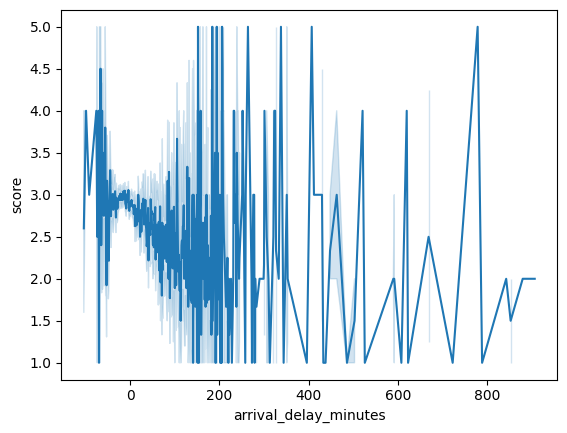

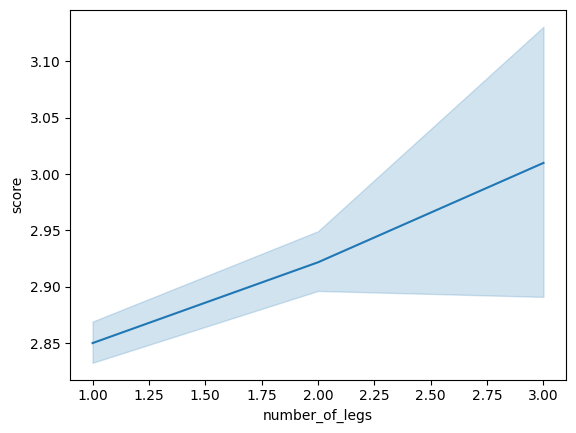

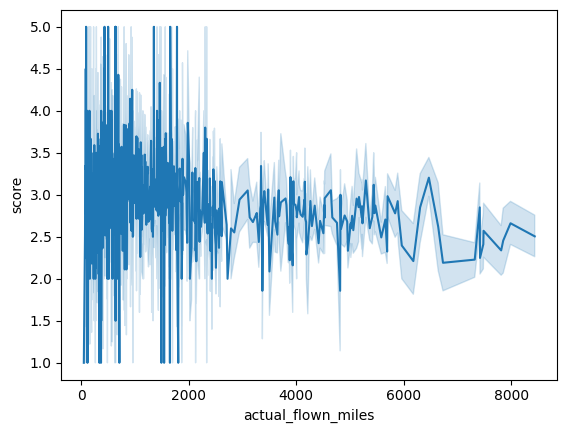

In [8]:
features = ['arrival_delay_minutes', 'number_of_legs', 'actual_flown_miles']
for i, col in enumerate(features):
    plt.figure(i)
    sb.lineplot(x = satisfactionScore[col], y = satisfactionScore['score'])

<Axes: xlabel='arrival_delay_minutes', ylabel='score'>

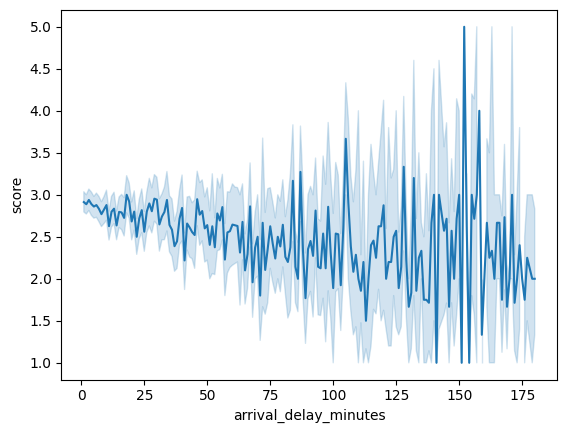

In [9]:
sb.lineplot(x = satisfactionScore[(satisfactionScore['arrival_delay_minutes'] <= 180) & (satisfactionScore['arrival_delay_minutes'] > 0)]['arrival_delay_minutes'], y = satisfactionScore['score'])

In [10]:
# # features = ['flight_number' ,'origin_station_code', 'destination_station_code', 'record_locator', 'scheduled_departure_date', 'question_text', 'score', 'satisfaction_type', 'driver_sub_group1', 'driver_sub_group2', 'arrival_delay_minutes', 'arrival_delay_group', 'cabin_code_desc', 'cabin_name', 'entity', 'number_of_legs', 'seat_factor_band', 'loyalty_program_level', 'generation', 'fleet_type_description', 'fleet_usage', 'equipment_type_code', 'ua_uax', 'actual_flown_miles' ,'haul_type', 'departure_gate','arrival_gate','international_domestic_indicator','response_group','media_provider','hub_spoke']
# fig=plt.figure(figsize=(20,20))

# features = ['flight_number' , 'arrival_delay_minutes', 'number_of_legs', 'actual_flown_miles']
# satisfactionScore = satisfactionScore.sort_values(by =  ['flight_number' , 'arrival_delay_minutes', 'number_of_legs', 'actual_flown_miles'] , ascending = [False, False, False, False])


# for i, feature in enumerate(features):
#     ax=fig.add_subplot(2,2,i+1)
#     ax.boxplot(satisfactionScore[feature], satisfactionScore['score'])
#     ax.set_title(feature+" Distribution",color='red')

# fig.tight_layout()  
# plt.show()

In [11]:
inventory.rename(columns = {'departure_station_code':'origin_station_code', 'arrival_station_code':'destination_station_code', 'scheduled_departure_dtl':'scheduled_departure_date'}, inplace = True)
preOrder.rename(columns = {'departure_station_code':'origin_station_code', 'arrival_station_code':'destination_station_code', 'scheduled_departure_dtl':'scheduled_departure_date'}, inplace = True)

In [12]:
df = pd.merge(satisfactionScore, inventory, on = ['flight_number', 'origin_station_code', 'destination_station_code', 'scheduled_departure_date'], how = 'left')
df = pd.merge(df, preOrder, on = ['flight_number', 'origin_station_code', 'destination_station_code', 'scheduled_departure_date', 'record_locator'], how = 'left')
# df = pd.merge(df, customerComments[['flight_number', 'origin_station_code', 'destination_station_code', 'scheduled_departure_date','verbatim_text']], on = ['flight_number', 'origin_station_code', 'destination_station_code', 'scheduled_departure_date'], how = 'left')

df.head()

# df.to_csv('final_merge_UA.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52592 entries, 0 to 52591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   flight_number                     52592 non-null  int64  
 1   origin_station_code               52592 non-null  object 
 2   destination_station_code          52592 non-null  object 
 3   record_locator                    52592 non-null  object 
 4   scheduled_departure_date          52592 non-null  object 
 5   question_text                     52592 non-null  object 
 6   score                             52592 non-null  int32  
 7   satisfaction_type                 52592 non-null  object 
 8   driver_sub_group1                 52592 non-null  object 
 9   driver_sub_group2                 52592 non-null  object 
 10  arrival_delay_minutes             52592 non-null  int64  
 11  arrival_delay_group               52592 non-null  object 
 12  cabi

In [14]:
print(df['scheduled_departure_date'].nunique())
print(type(df['scheduled_departure_date'].unique()))
for i in df['scheduled_departure_date'].unique().tolist():
    print(i)

30
<class 'numpy.ndarray'>
9/1/2022
9/2/2022
9/3/2022
9/4/2022
9/5/2022
9/6/2022
9/7/2022
9/8/2022
9/9/2022
9/10/2022
9/11/2022
9/12/2022
9/13/2022
9/14/2022
9/15/2022
9/16/2022
9/17/2022
9/18/2022
9/19/2022
9/20/2022
9/21/2022
9/22/2022
9/23/2022
9/24/2022
9/25/2022
9/26/2022
9/27/2022
9/28/2022
9/29/2022
9/30/2022



 loyalty_program_level
Number of Unique values in loyalty_program_level:  7
List of Unique values in loyalty_program_level:  [nan 'premier platinum' 'non-elite' 'premier silver' 'premier gold'
 'premier 1k' 'global services' 'NBK']
  loyalty_program_level     score
0                   NBK  2.600000
2       global services  2.646383
6      premier platinum  2.742899
4            premier 1k  2.838358
5          premier gold  2.843271
7        premier silver  2.932453
3             non-elite  2.961728
1                   NaN  2.993064


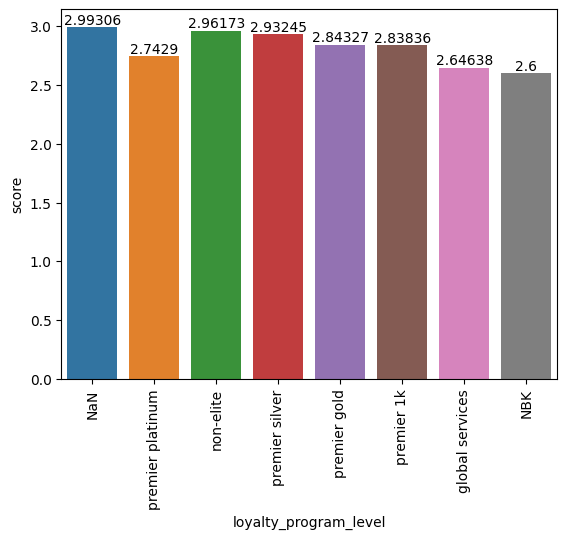


 cabin_code
Number of Unique values in cabin_code:  2
List of Unique values in cabin_code:  [nan 'J' 'Y']
  cabin_code     score
2          Y  2.732342
1        NaN  2.907306
0          J  3.295643


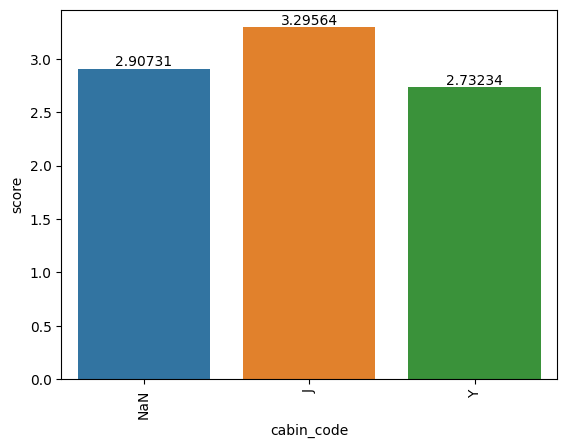


 international_domestic_indicator
Number of Unique values in international_domestic_indicator:  2
List of Unique values in international_domestic_indicator:  ['Domestic' 'International']
  international_domestic_indicator     score
1                    International  2.804375
0                         Domestic  2.974420


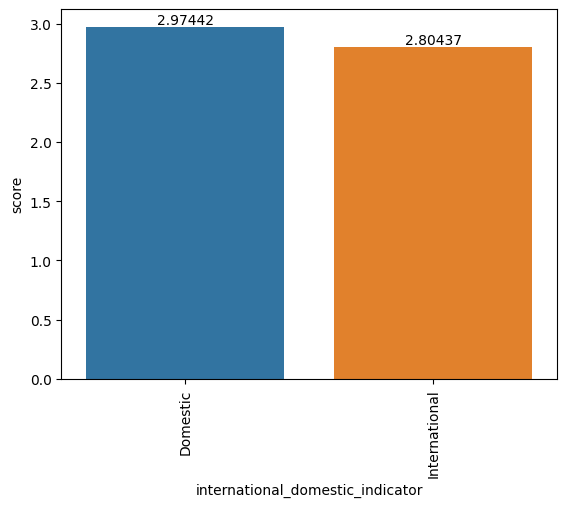


 haul_type
Number of Unique values in haul_type:  3
List of Unique values in haul_type:  ['Short' 'Medium' 'Long']
  haul_type     score
0      Long  2.716078
2     Short  2.884323
1    Medium  2.996528


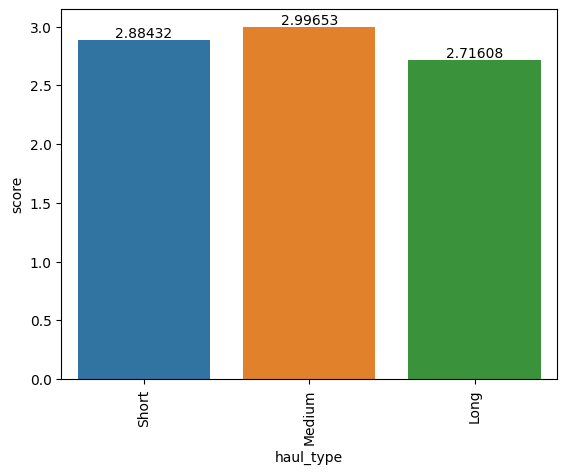


 number_of_legs
Number of Unique values in number_of_legs:  3
List of Unique values in number_of_legs:  [2 3 1]
   number_of_legs     score
0               1  2.917955
1               2  2.959276
2               3  2.998652


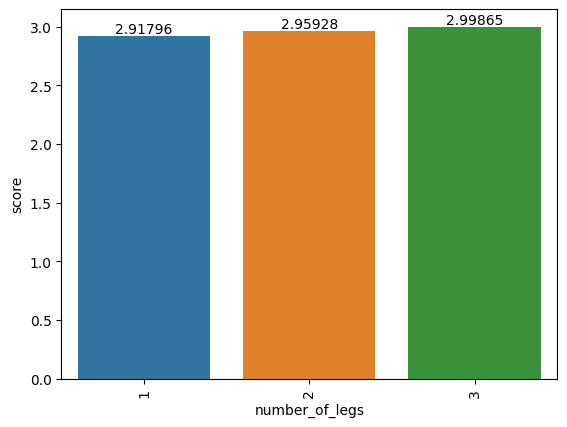


 entity
Number of Unique values in entity:  4
List of Unique values in entity:  ['Domestic' 'Pacific' 'Latin' 'Atlantic' nan]
     entity     score
3       NaN  1.000000
0  Atlantic  2.725026
4   Pacific  2.807927
2     Latin  2.951122
1  Domestic  2.974420


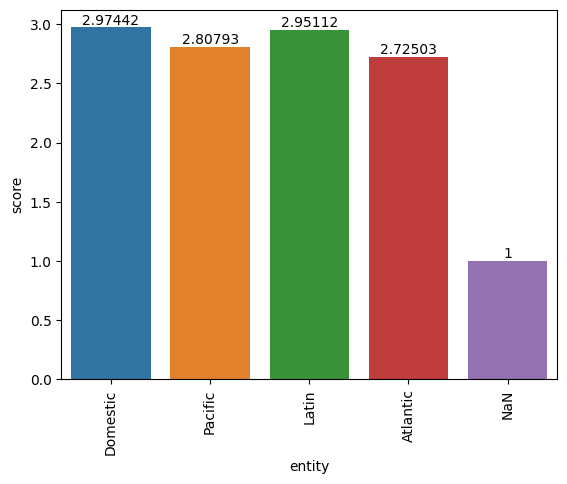


 ua_uax
Number of Unique values in ua_uax:  2
List of Unique values in ua_uax:  ['UAX' 'UA']
  ua_uax     score
0     UA  2.930194
1    UAX  2.951676


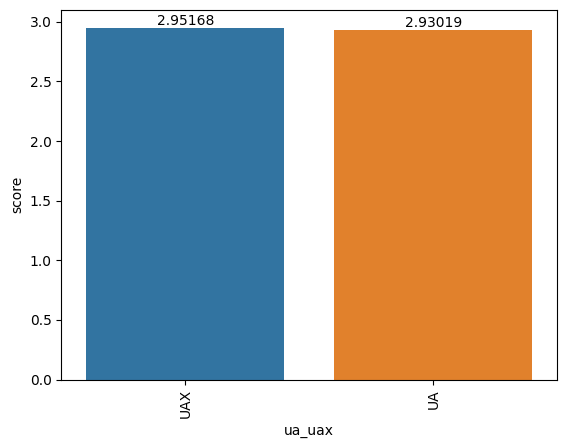


 meal_category
Number of Unique values in meal_category:  15
List of Unique values in meal_category:  [nan 'POULTRY' 'BREAKFAST' 'SNACKS' 'BEER' 'VEGETARIAN' 'BEEF/VEAL'
 'LIQUOR' 'GENERIC INT WINE A' 'PASTA' 'CHEESE' 'SEAFOOD' 'SANDWICH'
 'PORK' 'DINNER' 'VARIETY']
         meal_category     score
14             VARIETY  1.500000
11            SANDWICH  2.000000
5   GENERIC INT WINE A  2.405405
3               CHEESE  2.500000
8                PASTA  2.548387
6               LIQUOR  2.638889
13              SNACKS  2.694581
7                  NaN  2.907149
12             SEAFOOD  3.000000
10             POULTRY  3.048521
0            BEEF/VEAL  3.145138
15          VEGETARIAN  3.304348
1                 BEER  3.687500
2            BREAKFAST  3.778316
9                 PORK  4.333333
4               DINNER  5.000000


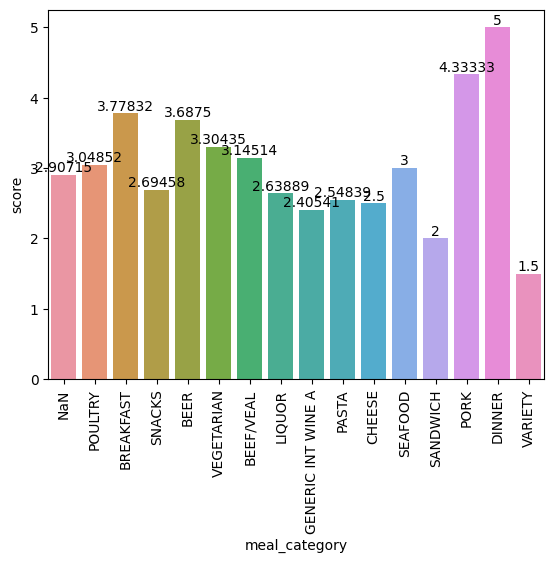

In [15]:
features = ['loyalty_program_level','cabin_code', 'international_domestic_indicator', 'haul_type', 'number_of_legs','entity', 'ua_uax', 'meal_category']

for i, feature in enumerate(features):
    print('\n',feature)
    print(f'Number of Unique values in {feature}: ', df[feature].nunique())
    print(f'List of Unique values in {feature}: ',df[feature].unique())

    df[feature] = df[feature].fillna('NaN')

    ls = df.groupby(feature)['score'].mean().to_frame().reset_index()
    print(ls.sort_values(by = 'score', ascending = True))
    
    plt.figure(i)
    loyaltyScore = sb.barplot(x = df[feature], y = df['score'], errorbar = None)
    loyaltyScore.bar_label(loyaltyScore.containers[0])
    for item in loyaltyScore.get_xticklabels():
        item.set_rotation(90)
    plt.show()


 seat_factor_band
4
['80+' '90+' '70+' '0 to 70']
  seat_factor_band     score
3              90+  2.910000
2              80+  2.936654
1              70+  2.996669
0          0 to 70  3.078420
  seat_factor_band     score
3              90+  2.910000
2              80+  2.936654
1              70+  2.996669
0          0 to 70  3.078420


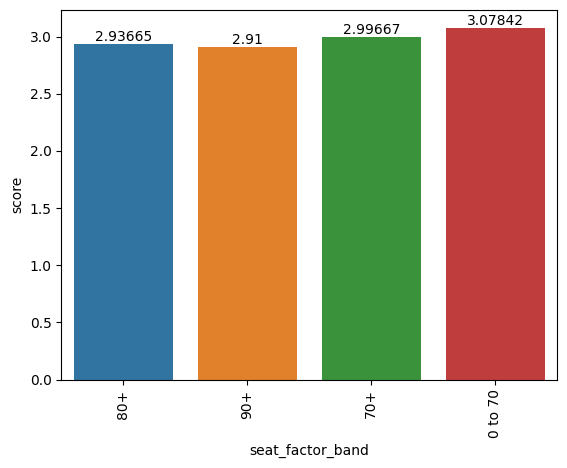


 meal_group
7
[nan 'ENTREES HOT' 'UNITED CATERER OWNED 88-3F' 'BEER' 'LIQUOR'
 'ALCOHOL BEVERAGES' 'ENTREES COLD' 'SANDWICHES']
                   meal_group     score
6                  SANDWICHES  2.000000
2                ENTREES COLD  2.357143
0           ALCOHOL BEVERAGES  2.405405
4                      LIQUOR  2.638889
7  UNITED CATERER OWNED 88-3F  2.694581
5                         NaN  2.907149
3                 ENTREES HOT  3.347638
1                        BEER  3.687500
                   meal_group     score
6                  SANDWICHES  2.000000
2                ENTREES COLD  2.357143
0           ALCOHOL BEVERAGES  2.405405
4                      LIQUOR  2.638889
7  UNITED CATERER OWNED 88-3F  2.694581
5                         NaN  2.907149
3                 ENTREES HOT  3.347638
1                        BEER  3.687500


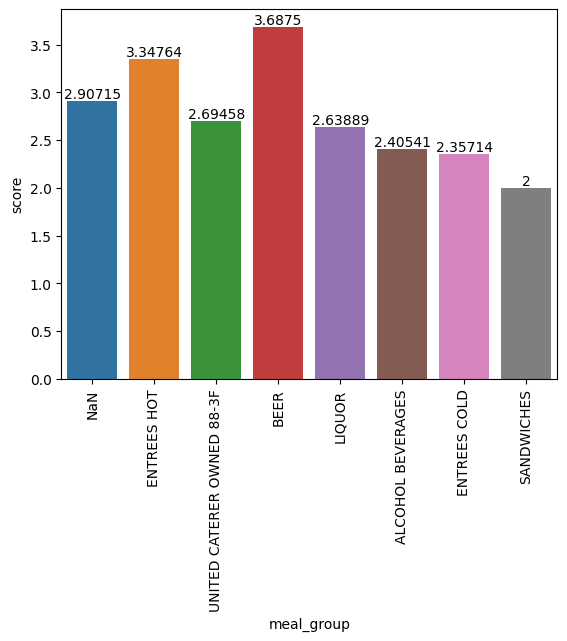


 hub_spoke
2
['spoke departure' 'hub departure']
         hub_spoke     score
1  spoke departure  2.890694
0    hub departure  2.958730
         hub_spoke     score
1  spoke departure  2.890694
0    hub departure  2.958730


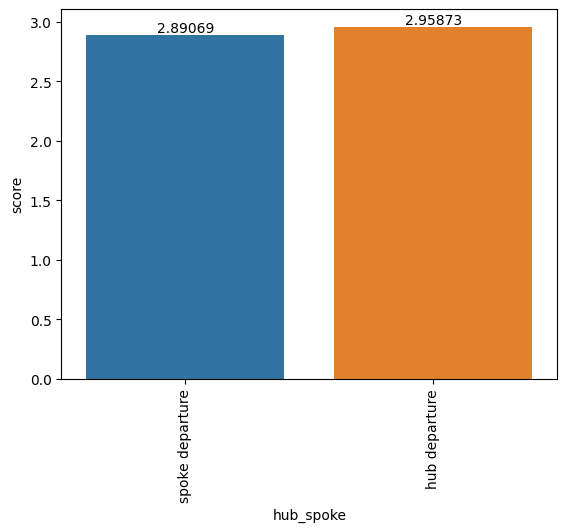


 origin_station_code
213
['MKX' 'COX' 'DEX' 'IAX' 'EWX' 'LAX' 'ASX' 'SPX' 'GRX' 'ORX' 'AUX' 'HDX'
 'ALX' 'GUX' 'SFX' 'RNX' 'DCX' 'CRX' 'TVX' 'DFX' 'DAX' 'SBX' 'CVX' 'CMX'
 'DSX' 'RAX' 'MSX' 'CLX' 'MFX' 'PIX' 'LEX' 'BDX' 'ONX' 'SNX' 'OKX' 'JAX'
 'BNX' 'BOX' 'OMX' 'XNX' 'BTX' 'GSX' 'IDX' 'BUX' 'INX' 'YUX' 'MEX' 'PWX'
 'SAX' 'SCX' 'ROX' 'MYX' 'PDX' 'ELX' 'SLX' 'PHX' 'MOX' 'SYX' 'BWX' 'FAX'
 'SGX' 'RDX' 'SEX' 'ATX' 'MIX' 'LGX' 'VEX' 'MCX' 'CHX' 'LWX' 'TYX' 'PSX'
 'SHX' 'YVX' 'TPX' 'CUX' 'GDX' 'GEX' 'FCX' 'FLX' 'SJX' 'NAX' 'PBX' 'SRX'
 'RSX' 'DTX' 'XPX' 'BZX' 'EYX' 'NRX' 'STX' 'MBX' 'PUX' 'BQX' 'MNX' 'YYX'
 'EUX' 'ANX' 'PTX' 'OGX' 'UIX' 'KOX' 'HNX' 'LIX' 'KEX' 'DUX' 'LHX' 'EDX'
 'OPX' 'BGX' 'MAX' 'CDX' 'AMX' 'BRX' 'BCX' 'GVX' 'ZRX' 'BEX' 'NCX' 'FRX'
 'VCX' 'PPX' 'MUX' 'MXX' 'GIX' 'EZX' 'ACX' 'ICX' 'TLX' 'CPX' 'JNX' 'SMX'
 'MRX' 'RIX' 'SDX' 'DDX' 'GPX' 'LNX' 'ILX' 'PNX' 'JLX' 'GTX' 'ABX' 'CIX'
 'QRX' 'TUX' 'JFX' 'PMX' 'LOX' 'SIX' 'CGX' 'AVX' 'EGX' 'DRX' 'CAX' 'PVX'
 'ERX' 'YQX' 'HOX' 'SUX' 

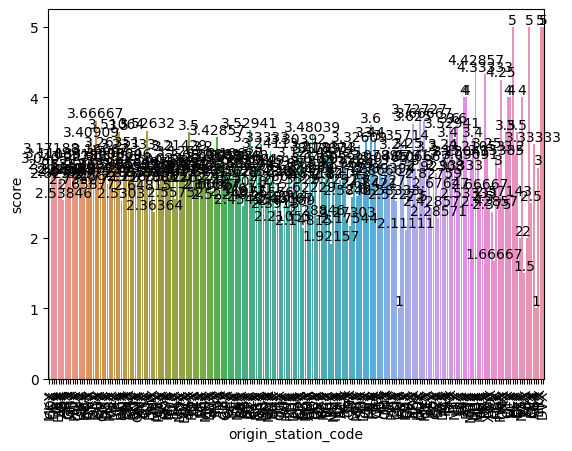

In [16]:
features = ['seat_factor_band','meal_group','hub_spoke','origin_station_code']

for i, feature in enumerate(features):
    print('\n',feature)
    print(df[feature].nunique())
    print(df[feature].unique())

    df[feature] = df[feature].fillna('NaN')

    ls = df.groupby(feature)['score'].mean().to_frame().reset_index()
    print(ls.sort_values(by = 'score').head(20))
    print(ls.sort_values(by = 'score').tail(20))
    
    plt.figure(i)
    loyaltyScore = sb.barplot(x = df[feature], y = df['score'], errorbar = None)
    loyaltyScore.bar_label(loyaltyScore.containers[0])
    for item in loyaltyScore.get_xticklabels():
        item.set_rotation(90)
    plt.show()

In [17]:
flight = df[df['score'] >= 4].groupby(['flight_number', 'origin_station_code', 'destination_station_code', 'scheduled_departure_date'])['score'].count().to_frame().reset_index()
# flight = flight.dropna()
flight.rename(columns = {'score':'scorePos'}, inplace = True)
print(flight.head())
print(flight.info())

flightCount = df.groupby(['flight_number', 'origin_station_code', 'destination_station_code', 'scheduled_departure_date'])['score'].count().to_frame().reset_index()
print(flightCount.head())
print(flightCount.info())

flight = flight.merge(flightCount,on = ['flight_number', 'origin_station_code', 'destination_station_code', 'scheduled_departure_date'], how = 'left')

print('\n')

print(flight.head())
print(flight.info())

# flight['Total_Count'] = flightCount['score']
flight['positivePer'] = flight['scorePos']/flight['score'] * 100

print(flight.sort_values(by = 'positivePer', ascending = False).head(10))
print(flight.sort_values(by = 'positivePer', ascending = False).tail(10))

   flight_number origin_station_code destination_station_code  \
0              2                 SFX                      SIX   
1              2                 SFX                      SIX   
2              2                 SFX                      SIX   
3              2                 SFX                      SIX   
4              2                 SFX                      SIX   

  scheduled_departure_date  scorePos  
0                9/11/2022         1  
1                9/14/2022         1  
2                9/19/2022         1  
3                9/21/2022         1  
4                9/22/2022         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11192 entries, 0 to 11191
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   flight_number             11192 non-null  int64 
 1   origin_station_code       11192 non-null  object
 2   destination_station_code  11192 non-null  obje

Counter({100.0: 8002, 50.0: 1935, 33.33333333333333: 586, 66.66666666666666: 298, 25.0: 149, 40.0: 51, 75.0: 49, 20.0: 38, 60.0: 25, 16.666666666666664: 25, 80.0: 7, 28.57142857142857: 7, 42.857142857142854: 6, 14.285714285714285: 5, 57.14285714285714: 3, 62.5: 1, 71.42857142857143: 1, 22.22222222222222: 1, 18.181818181818183: 1, 12.5: 1, 44.44444444444444: 1})


C:\Users\dell\anaconda3\envs\datascience\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


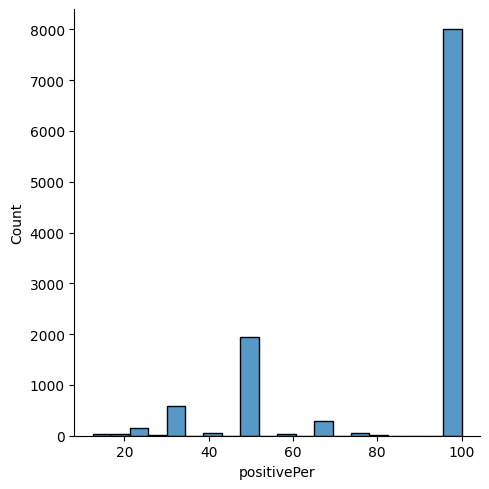

In [18]:
sb.displot(flight['positivePer'])

from collections import Counter
vals = Counter(flight['positivePer'])
print(vals)

# for i, j in vals.items():
#     print(i,'  :   ',j)

C:\Users\dell\AppData\Local\Temp\ipykernel_13004\2300261790.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meal_category[feature] = df_meal_category[feature].fillna('NaN')



 VARIETY
2
['Beef and turkey pastrami meats' 'Arepa and black bean relish']
           meal_short_description  score
0     Arepa and black bean relish    2.0
1  Beef and turkey pastrami meats    1.0


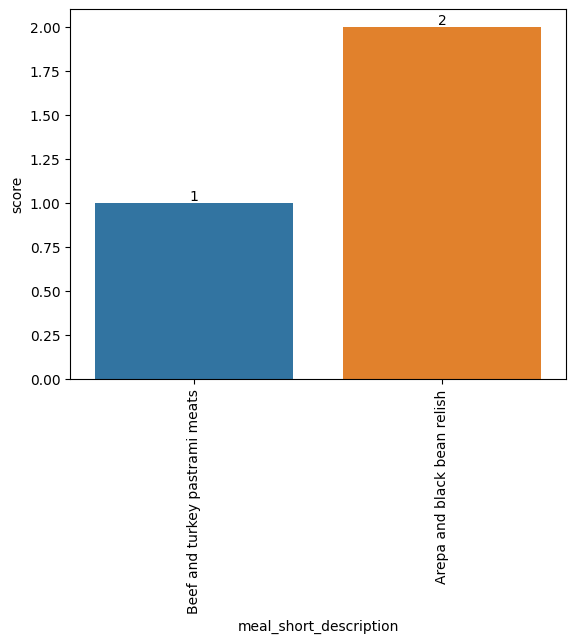


 SANDWICH
1
['Scrambled egg sandwich']
   meal_short_description  score
0  Scrambled egg sandwich    2.0


C:\Users\dell\AppData\Local\Temp\ipykernel_13004\2300261790.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meal_category[feature] = df_meal_category[feature].fillna('NaN')


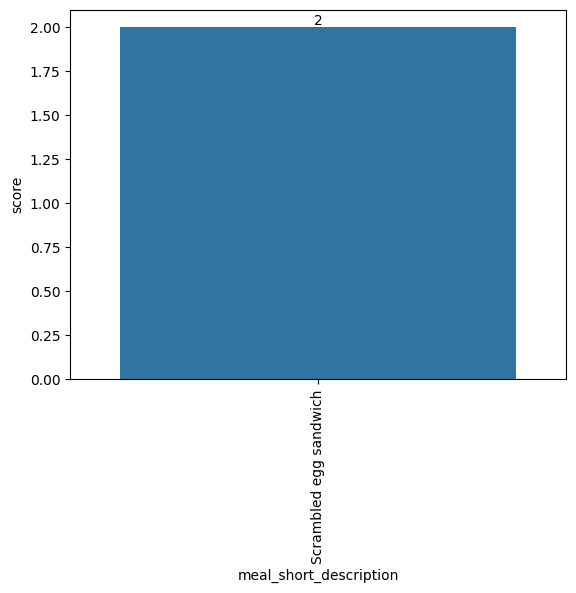

C:\Users\dell\AppData\Local\Temp\ipykernel_13004\2300261790.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meal_category[feature] = df_meal_category[feature].fillna('NaN')



 GENERIC INT WINE A
2
['Red Wine' 'White Wine']
  meal_short_description     score
0               Red Wine  2.409091
1             White Wine  2.400000


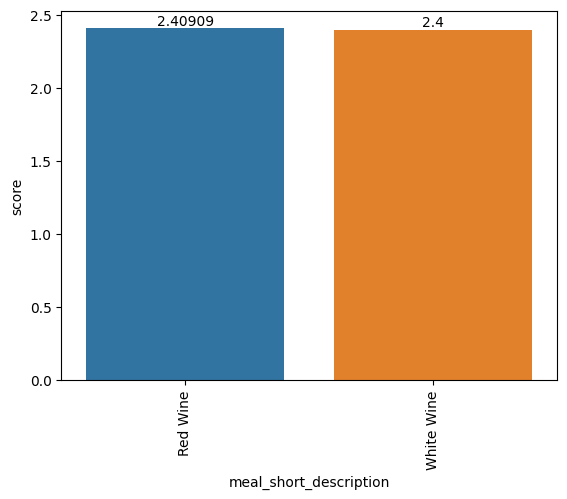


 CHEESE
1
['Classic selection cheese tray']
          meal_short_description  score
0  Classic selection cheese tray    2.5


C:\Users\dell\AppData\Local\Temp\ipykernel_13004\2300261790.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meal_category[feature] = df_meal_category[feature].fillna('NaN')


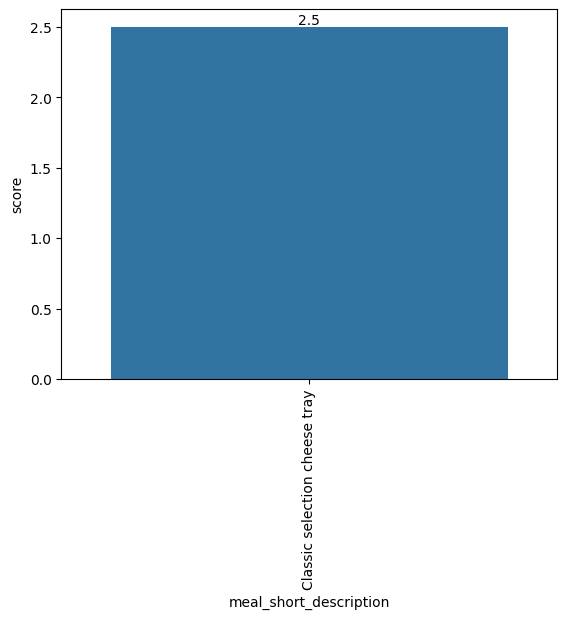


 PASTA
3
['Cacio e Pepe ravioli' 'Spinach and cheese canneloni'
 'Ricotta and mushroom filled tortellini']
                   meal_short_description     score
0                    Cacio e Pepe ravioli  3.500000
1  Ricotta and mushroom filled tortellini  2.500000
2            Spinach and cheese canneloni  2.117647


C:\Users\dell\AppData\Local\Temp\ipykernel_13004\2300261790.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meal_category[feature] = df_meal_category[feature].fillna('NaN')


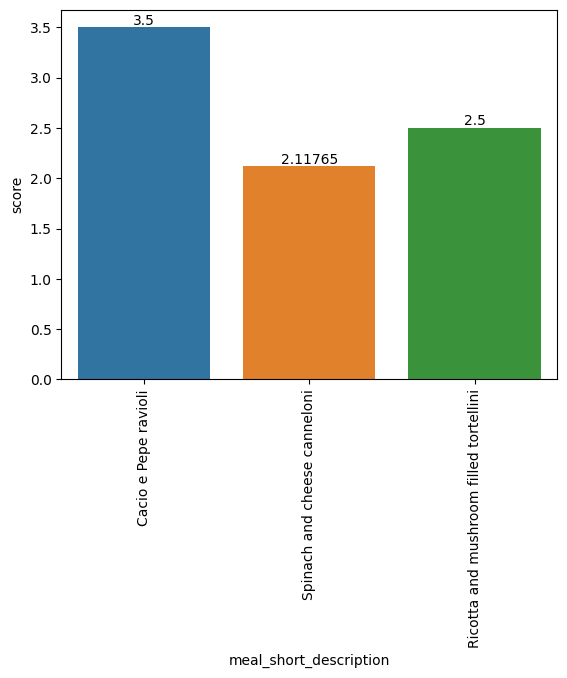

In [19]:
#to find out pain points in the meal categories 

mealCategory = ['VARIETY', 'SANDWICH', 'GENERIC INT WINE A', 'CHEESE', 'PASTA']

for j, mealCat in enumerate(mealCategory):
    
    df_meal_category = df[df['meal_category'] == mealCat] 
    
    feature = 'meal_short_description'
    
    print('\n',mealCat)
    print(df_meal_category[feature].nunique())
    print(df_meal_category[feature].unique())

    df_meal_category[feature] = df_meal_category[feature].fillna('NaN')

    ls = df_meal_category.groupby(feature)['score'].mean().to_frame().reset_index()
    print(ls)

    plt.figure(i)
    loyaltyScore = sb.barplot(x = df_meal_category[feature], y = df_meal_category['score'], errorbar = None)
    loyaltyScore.bar_label(loyaltyScore.containers[0])
    for item in loyaltyScore.get_xticklabels():
        item.set_rotation(90)
    plt.show()